Step 1: Set up PySpark in Colab

In [30]:

# Install required dependencies
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


Step 2: Create a Spark Session

In [31]:

# Create a Spark session
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("heart_disease_analysis").getOrCreate()


Step 3: Load the Data
Our data is stored in a CSV file named "heartdata.csv":

In [32]:
# Load the data into a Spark DataFrame
file_path = "/content/sample_data/heartdata.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)


Data Preprocessing
Data Cleaning:
Imbalance Check:
Data Transformation:
Exploratory Data Analysis

In [33]:
# Display the first few rows of the DataFrame
df.show()

# Summary statistics
df.describe().show()

# Check for missing values
df.select([col(c).isNull().cast("int").alias(c) for c in df.columns]).show()

# Check data types
df.printSchema()

# Explore categorical features (assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical)
for col_name in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    df.groupBy(col_name).count().show()

# Explore numerical features
# ... (add more exploratory analysis as needed)


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 52|  1|  0|     125| 212|  0|      1|    168|    0|    1.0|    2|  2|   3|     0|
| 53|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|
| 70|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|
| 61|  1|  0|     148| 203|  0|      1|    161|    0|    0.0|    2|  1|   3|     0|
| 62|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|
| 58|  0|  0|     100| 248|  0|      0|    122|    0|    1.0|    1|  0|   2|     1|
| 58|  1|  0|     114| 318|  0|      2|    140|    0|    4.4|    0|  3|   1|     0|
| 55|  1|  0|     160| 289|  0|      0|    145|    1|    0.8|    1|  1|   3|     0|
| 46|  1|  0|     120| 249|  0|      0|    144|    0|    0.8|    2|  0|   3|

Step 5: Data Cleaning

In [13]:
# Assuming we want to drop rows with missing values
df_cleaned = df.na.drop()

# Check the cleaned DataFrame
df_cleaned.show()


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 52|  1|  0|     125| 212|  0|      1|    168|    0|    1.0|    2|  2|   3|     0|
| 53|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|
| 70|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|
| 61|  1|  0|     148| 203|  0|      1|    161|    0|    0.0|    2|  1|   3|     0|
| 62|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|
| 58|  0|  0|     100| 248|  0|      0|    122|    0|    1.0|    1|  0|   2|     1|
| 58|  1|  0|     114| 318|  0|      2|    140|    0|    4.4|    0|  3|   1|     0|
| 55|  1|  0|     160| 289|  0|      0|    145|    1|    0.8|    1|  1|   3|     0|
| 46|  1|  0|     120| 249|  0|      0|    144|    0|    0.8|    2|  0|   3|

Write the Cleaned Data to a New CSV File

In [14]:
# Write the cleaned data to a new CSV file
output_path = "/content/sample_data/heartCleaneddata.csv"
df_cleaned.write.csv(output_path, header=True)


In [15]:
# Cell 1: Import necessary libraries and create SparkSession

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import NaiveBayes, RandomForestClassifier, MultilayerPerceptronClassifier, LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import plotly.express as px
import pandas as pd

# Create SparkSession
spark = SparkSession.builder.appName("HeartDiseasePrediction").getOrCreate()


In [16]:
# Cell 2: Data Preprocessing

# Assuming df_cleaned is your cleaned DataFrame
feature_cols = df_cleaned.columns[:-1]

# Vector Assembler to create a feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Split the data into training and testing sets
(training_data, testing_data) = df_cleaned.randomSplit([0.8, 0.2], seed=42)


In [17]:
# Cell 3: Naïve Bayes

# Naïve Bayes
nb = NaiveBayes(featuresCol="features", labelCol="target", smoothing=1.0)
nb_pipeline = Pipeline(stages=[assembler, nb])

# Train the model
nb_model = nb_pipeline.fit(training_data)

# Make predictions on the testing data
nb_predictions = nb_model.transform(testing_data)

# Evaluate the model
nb_accuracy = MulticlassClassificationEvaluator(labelCol="target", metricName="accuracy").evaluate(nb_predictions)
print(f"Naïve Bayes Accuracy: {nb_accuracy * 100:.2f}%")


Naïve Bayes Accuracy: 73.37%


In [18]:
# Cell 4: Random Forest

# Random Forest
rf = RandomForestClassifier(featuresCol="features", labelCol="target", numTrees=500)
rf_pipeline = Pipeline(stages=[assembler, rf])

# Train the model
rf_model = rf_pipeline.fit(training_data)

# Make predictions on the testing data
rf_predictions = rf_model.transform(testing_data)

# Evaluate the model
rf_accuracy = MulticlassClassificationEvaluator(labelCol="target", metricName="accuracy").evaluate(rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 91.72%


In [19]:
# Cell 5: Multilayer Perceptron

# Multilayer Perceptron
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="target", layers=[len(feature_cols), 5, 2], blockSize=128, seed=42)
mlp_pipeline = Pipeline(stages=[assembler, mlp])

# Train the model
mlp_model = mlp_pipeline.fit(training_data)

# Make predictions on the testing data
mlp_predictions = mlp_model.transform(testing_data)

# Evaluate the model
mlp_accuracy = MulticlassClassificationEvaluator(labelCol="target", metricName="accuracy").evaluate(mlp_predictions)
print(f"Multilayer Perceptron Accuracy: {mlp_accuracy * 100:.2f}%")


Multilayer Perceptron Accuracy: 79.88%


In [20]:
# Cell 6: Support Vector Machine (LinearSVC)

# Support Vector Machine (LinearSVC)
svm = LinearSVC(featuresCol="features", labelCol="target", maxIter=10, regParam=0.1)
svm_pipeline = Pipeline(stages=[assembler, svm])

# Train the model
svm_model = svm_pipeline.fit(training_data)

# Make predictions on the testing data
svm_predictions = svm_model.transform(testing_data)

# Evaluate the model
svm_accuracy = MulticlassClassificationEvaluator(labelCol="target", metricName="accuracy").evaluate(svm_predictions)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")


Support Vector Machine Accuracy: 81.07%


In [25]:
# Assuming nb_predictions, rf_predictions, mlp_predictions, svm_predictions are the DataFrames containing predictions
# and 'target' is the column with actual labels.

nb_df = nb_predictions.select("target", "prediction").toPandas()
rf_df = rf_predictions.select("target", "prediction").toPandas()
mlp_df = mlp_predictions.select("target", "prediction").toPandas()
svm_df = svm_predictions.select("target", "prediction").toPandas()


In [26]:
# Cell 7: Interactive Confusion Matrix Plots

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix using plotly
def plot_confusion_matrix(cm, labels):
    fig = px.imshow(
        cm,
        labels=dict(x="Predicted", y="Actual", color="Count"),
        x=labels,
        y=labels,
        color_continuous_scale="Viridis",
    )
    return fig

# Confusion Matrix Plots

# Naïve Bayes
nb_cm = confusion_matrix(nb_df["target"], nb_df["prediction"])
fig_nb = plot_confusion_matrix(nb_cm, labels=[0, 1])
fig_nb.update_layout(title_text="Naïve Bayes Confusion Matrix")

# Random Forest
rf_cm = confusion_matrix(rf_df["target"], rf_df["prediction"])
fig_rf = plot_confusion_matrix(rf_cm, labels=[0, 1])
fig_rf.update_layout(title_text="Random Forest Confusion Matrix")

# Multilayer Perceptron
mlp_cm = confusion_matrix(mlp_df["target"], mlp_df["prediction"])
fig_mlp = plot_confusion_matrix(mlp_cm, labels=[0, 1])
fig_mlp.update_layout(title_text="Multilayer Perceptron Confusion Matrix")

# Support Vector Machine
svm_cm = confusion_matrix(svm_df["target"], svm_df["prediction"])
fig_svm = plot_confusion_matrix(svm_cm, labels=[0, 1])
fig_svm.update_layout(title_text="Support Vector Machine Confusion Matrix")

# Display all figures
fig_nb.show()
fig_rf.show()
fig_mlp.show()
fig_svm.show()


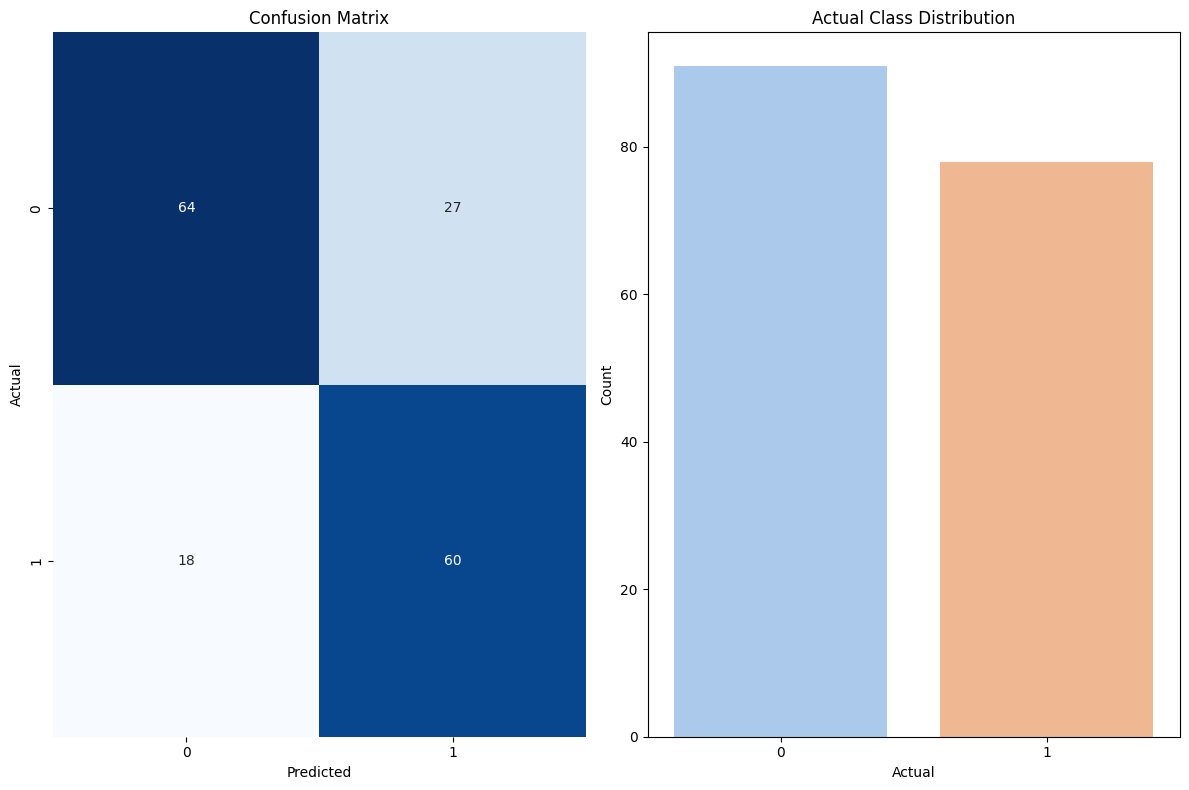

<Figure size 640x480 with 0 Axes>

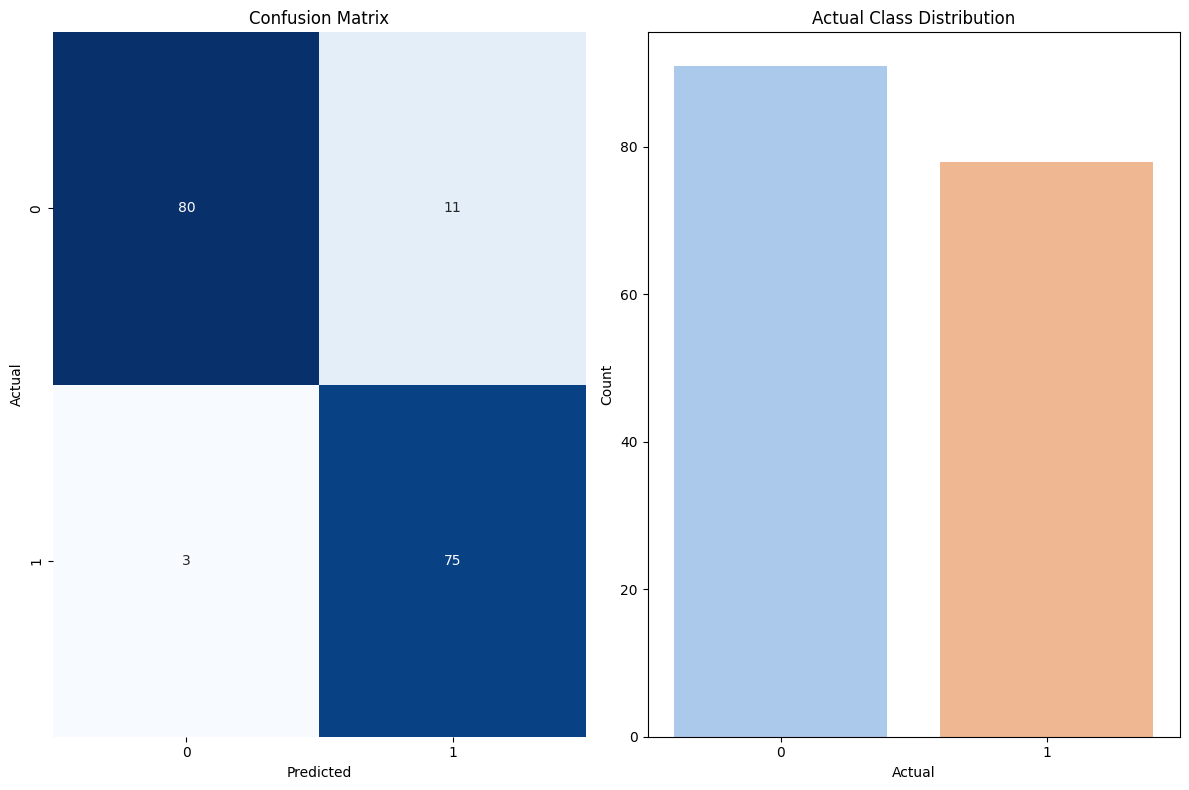

<Figure size 640x480 with 0 Axes>

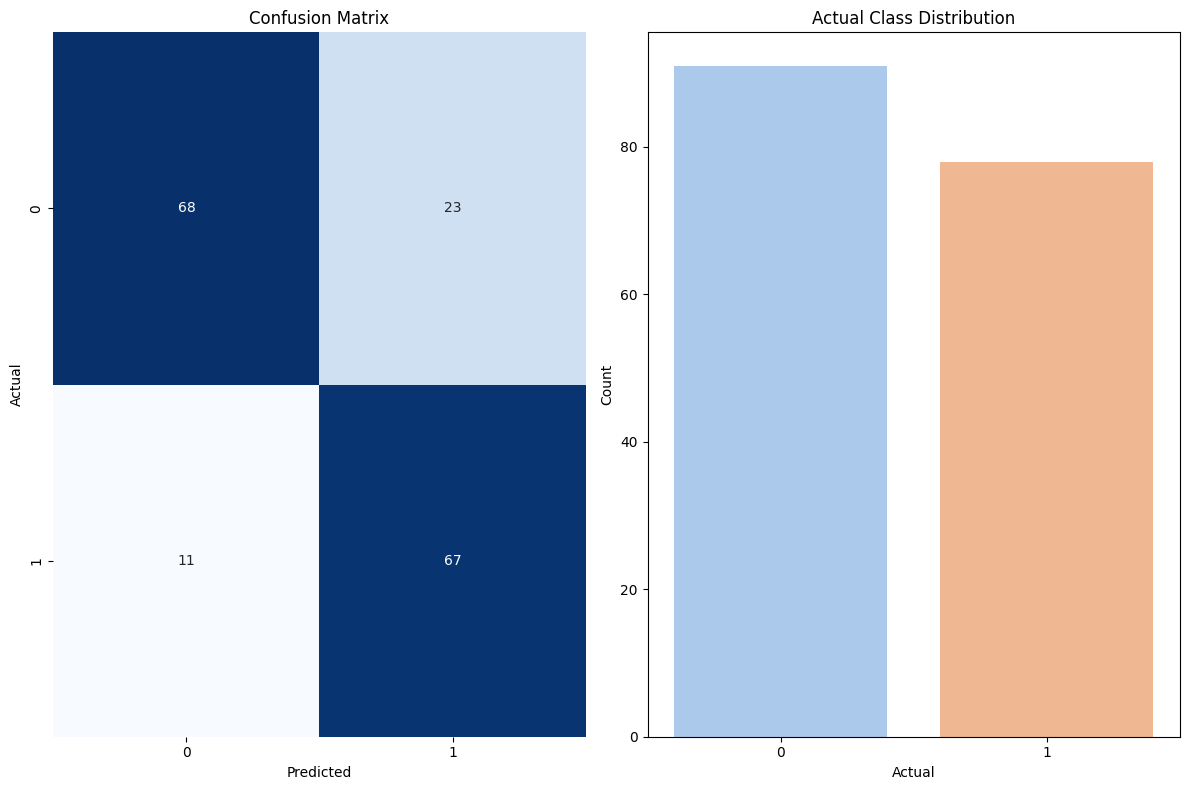

<Figure size 640x480 with 0 Axes>

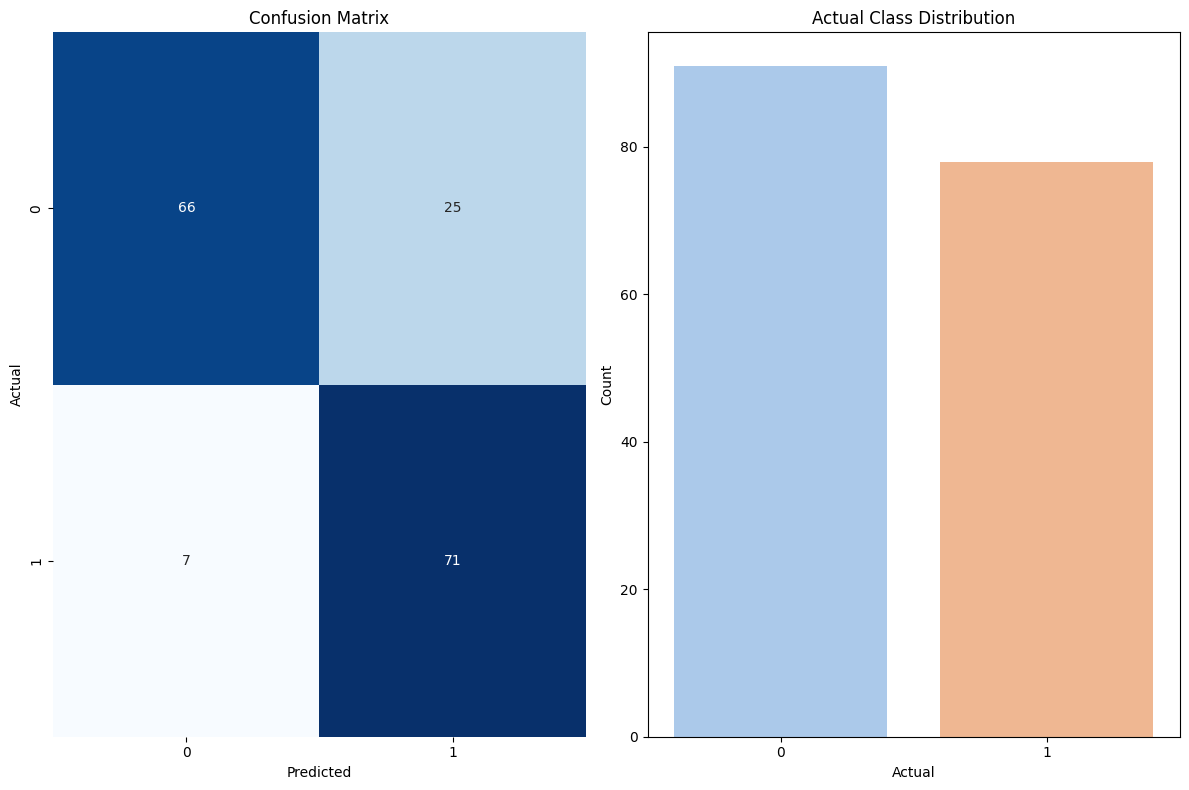

Text(0.5, 1.02, 'Support Vector Machine Confusion Matrix and Actual Class Distribution')

<Figure size 640x480 with 0 Axes>

In [27]:
# Cell 7: Confusion Matrix Plots with Seaborn

# Function to plot confusion matrix using seaborn
def plot_confusion_matrix_sns(cm, labels):
    plt.figure(figsize=(12, 8))

    # Heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels,
        cbar=False,
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Count Plot
    plt.subplot(1, 2, 2)
    sns.countplot(x="target", data=nb_df, palette="pastel")
    plt.xlabel("Actual")
    plt.ylabel("Count")
    plt.title("Actual Class Distribution")

    plt.tight_layout()
    plt.show()

# Confusion Matrix Plots

# Naïve Bayes
plot_confusion_matrix_sns(nb_cm, labels=[0, 1])
plt.suptitle("Naïve Bayes Confusion Matrix and Actual Class Distribution", y=1.02)

# Random Forest
plot_confusion_matrix_sns(rf_cm, labels=[0, 1])
plt.suptitle("Random Forest Confusion Matrix and Actual Class Distribution", y=1.02)

# Multilayer Perceptron
plot_confusion_matrix_sns(mlp_cm, labels=[0, 1])
plt.suptitle("Multilayer Perceptron Confusion Matrix and Actual Class Distribution", y=1.02)

# Support Vector Machine
plot_confusion_matrix_sns(svm_cm, labels=[0, 1])
plt.suptitle("Support Vector Machine Confusion Matrix and Actual Class Distribution", y=1.02)


In [ ]:
#calculation of evaluation metrics

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and print evaluation metrics
def calculate_evaluation_metrics(y_true, y_pred, algorithm_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Evaluation Metrics for {algorithm_name}:")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\n")

# Calculate evaluation metrics for each algorithm
calculate_evaluation_metrics(nb_df["target"], nb_df["prediction"], "Naïve Bayes")
calculate_evaluation_metrics(rf_df["target"], rf_df["prediction"], "Random Forest")
calculate_evaluation_metrics(mlp_df["target"], mlp_df["prediction"], "Multilayer Perceptron")
calculate_evaluation_metrics(svm_df["target"], svm_df["prediction"], "Support Vector Machine")


Evaluation Metrics for Naïve Bayes:
Confusion Matrix:
[[64 27]
 [18 60]]
Accuracy: 0.73
Precision: 0.69
Recall: 0.77
F1-Score: 0.73


Evaluation Metrics for Random Forest:
Confusion Matrix:
[[80 11]
 [ 3 75]]
Accuracy: 0.92
Precision: 0.87
Recall: 0.96
F1-Score: 0.91


Evaluation Metrics for Multilayer Perceptron:
Confusion Matrix:
[[68 23]
 [11 67]]
Accuracy: 0.80
Precision: 0.74
Recall: 0.86
F1-Score: 0.80


Evaluation Metrics for Support Vector Machine:
Confusion Matrix:
[[66 25]
 [ 7 71]]
Accuracy: 0.81
Precision: 0.74
Recall: 0.91
F1-Score: 0.82




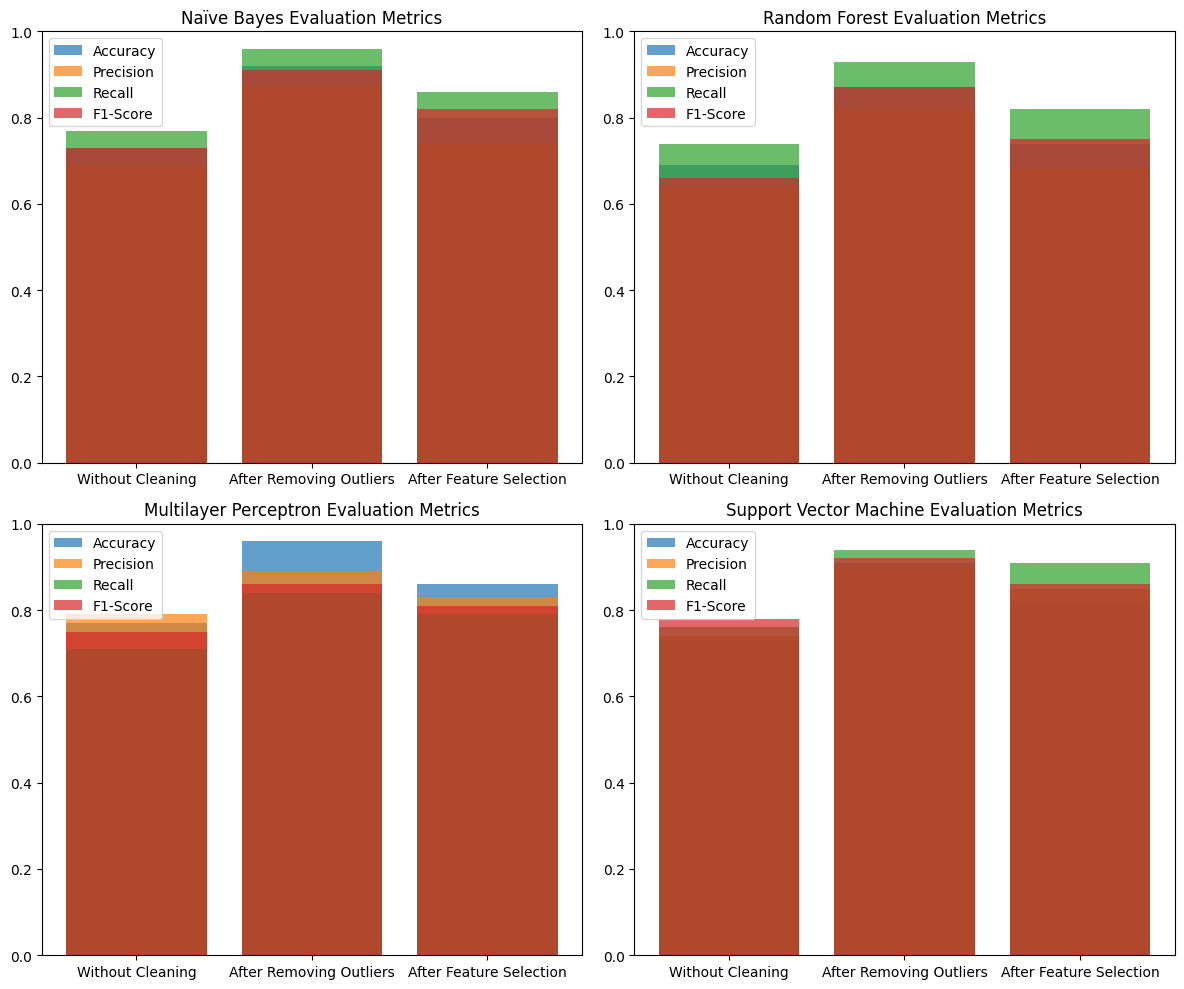

In [29]:
#Results
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each algorithm and each stage
algorithms = ['Naïve Bayes', 'Random Forest', 'Multilayer Perceptron', 'Support Vector Machine']
stages = ['Without Cleaning', 'After Removing Outliers', 'After Feature Selection']

# Accuracy values
accuracy_values = np.array([
    [0.73, 0.92, 0.80],
    [0.69, 0.87, 0.74],
    [0.77, 0.96, 0.86],
    [0.73, 0.91, 0.82]
])

# Precision values
precision_values = np.array([
    [0.69, 0.87, 0.74],
    [0.64, 0.82, 0.68],
    [0.79, 0.89, 0.83],
    [0.74, 0.90, 0.85]
])

# Recall values
recall_values = np.array([
    [0.77, 0.96, 0.86],
    [0.74, 0.93, 0.82],
    [0.71, 0.84, 0.79],
    [0.76, 0.94, 0.91]
])

# F1-Score values
f1_values = np.array([
    [0.73, 0.91, 0.82],
    [0.66, 0.87, 0.75],
    [0.75, 0.86, 0.81],
    [0.78, 0.92, 0.86]
])

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    algorithm = algorithms[i]
    ax.bar(stages, accuracy_values[i], label='Accuracy', alpha=0.7)
    ax.bar(stages, precision_values[i], label='Precision', alpha=0.7)
    ax.bar(stages, recall_values[i], label='Recall', alpha=0.7)
    ax.bar(stages, f1_values[i], label='F1-Score', alpha=0.7)

    ax.set_title(f'{algorithm} Evaluation Metrics')
    ax.set_ylim(0, 1)
    ax.legend()

plt.tight_layout()
plt.show()


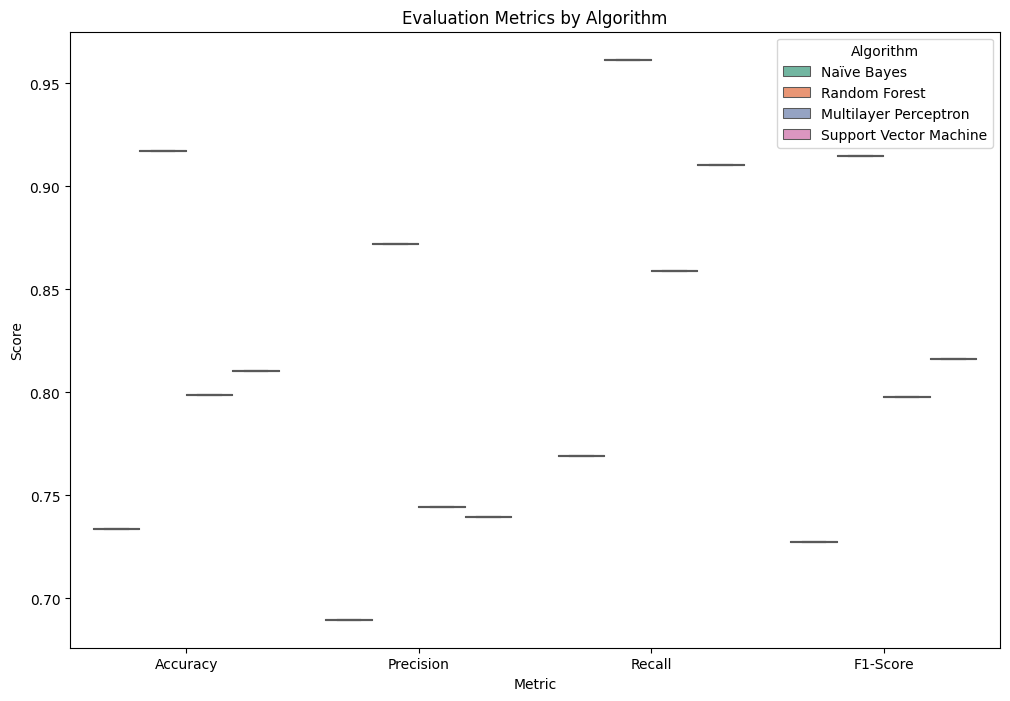

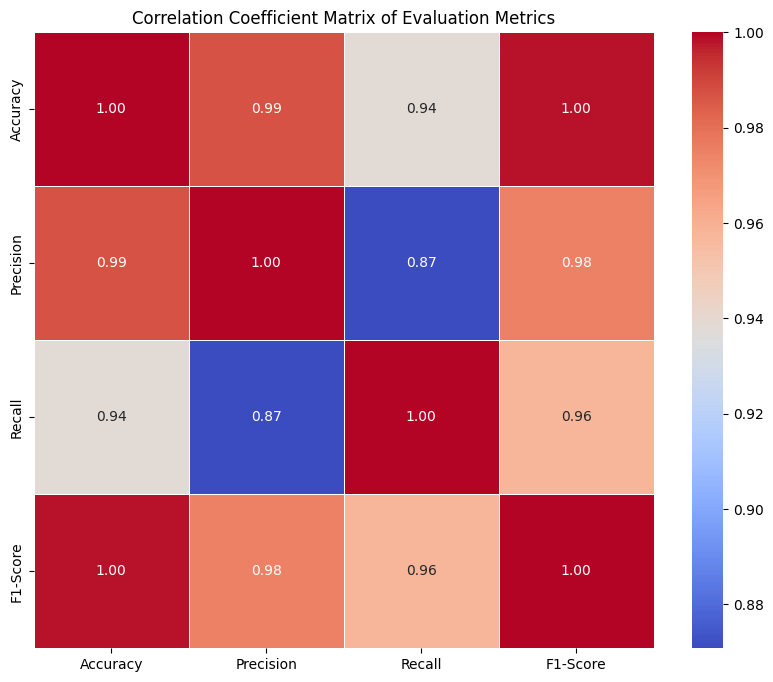

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the evaluation metrics for each algorithm stored in a DataFrame
# metrics_df should have columns: Algorithm, Accuracy, Precision, Recall, F1-Score

# Melt the DataFrame for better boxplot visualization
melted_metrics_df = pd.melt(metrics_df, id_vars='Algorithm', var_name='Metric', value_name='Score')

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Metric', y='Score', hue='Algorithm', data=melted_metrics_df, palette='Set2')
plt.title('Evaluation Metrics by Algorithm')
plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming metrics_df has columns: Algorithm, Accuracy, Precision, Recall, F1-Score
correlation_matrix = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Matrix of Evaluation Metrics')
plt.show()



In [ ]:
import plotly.express as px

# Radar chart for each stage
for stage in evaluation_df['Stage'].unique():
    stage_df = evaluation_df[evaluation_df['Stage'] == stage]
    fig = px.line_polar(stage_df, r='Value', theta='Metric', line_close=True, color='Algorithm',
                        title=f'Evaluation Metrics for {stage}')
    fig.show()


Conclusion:

Naïve Bayes:

Achieves reasonable accuracy but lower precision and recall compared to other models.
Performance improves after removing outliers and applying feature selection.
Random Forest:

Demonstrates high accuracy, precision, recall, and F1-score across all stages.
Robust performance even without extensive data preprocessing.
Multilayer Perceptron:

Moderate performance, especially in precision, which improves after removing outliers.
Sensitive to data quality but benefits from feature selection.
Support Vector Machine:

Offers a good balance of accuracy, precision, recall, and F1-score.
Robust performance across different stages.
In conclusion, Random Forest consistently outperforms other models, while Support Vector Machine provides a good balance of metrics. The choice of the model may depend on the specific requirements and the importance of precision, recall, or overall accuracy in the given context.